## Objective
Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners. <br>
Estimate the delivery time taken by the delivery partners to reach to customers with their orders.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics as smetrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import metrics as kmetrics

from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras import regularizers

np.random.seed(0)

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [57]:
# checking the data types of all the features and structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [58]:
# checking null values
print('Null values in % for each feature:')
(df.isnull().sum()/df.shape[0] )*100

Null values in % for each feature:


market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
dtype: float64

Null values in % for each feature:


market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
dtype: float64

Max null values are present in *total_outstanding_orders*,*total_busy_partners*,and *total_onshift_partners* followed by *store_primary_category* with 8.236,8.26, 8.236 and 2.411 respectively.

In [59]:
# checking for duplicates
print('total duplicate rows present:')
df.duplicated().sum()

total duplicate rows present:


0

total duplicate rows present:


0

### 2. Data Preprocessing

In [60]:
# changing the datatype of features 'created_at' and 'actual_delivery_time'
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

#### 2.1 Feature Engineering

In [61]:
# data for the order with missing delivery
df[df['actual_delivery_time'].isnull() == True]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
109,3.0,2015-02-10 21:51:54,NaT,da353f402faf6cf475d4abd1450b0882,sandwich,3.0,1,1125,1,975,975,7.0,5.0,4.0
7670,2.0,2015-02-08 02:54:42,NaT,140f6969d5213fd0ece03148e62e461e,japanese,2.0,4,2860,3,390,690,131.0,123.0,197.0
78511,4.0,2015-02-15 02:15:45,NaT,1f0e3dad99908345f7439f8ffabdffc4,catering,1.0,9,5050,6,375,1125,91.0,75.0,167.0
115982,4.0,2015-02-16 01:52:49,NaT,b92894e4589f652dc3116cb3a8c48c08,pizza,3.0,2,2094,2,599,1195,53.0,53.0,102.0
140635,2.0,2015-02-15 02:21:42,NaT,0d73a25092e5c1c9769a9f3255caa65a,dessert,1.0,3,4210,3,865,1850,123.0,91.0,176.0
158967,2.0,2015-02-01 01:21:29,NaT,faacbcd5bf1d018912c116bf2783e9a1,mexican,5.0,5,3447,3,225,1349,90.0,88.0,109.0
170416,5.0,2015-02-01 01:36:33,NaT,6c7a107981f9c2a0ed55efce297bd1e2,fast,4.0,3,982,3,165,575,41.0,31.0,31.0


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
109,3.0,2015-02-10 21:51:54,NaT,da353f402faf6cf475d4abd1450b0882,sandwich,3.0,1,1125,1,975,975,7.0,5.0,4.0
7670,2.0,2015-02-08 02:54:42,NaT,140f6969d5213fd0ece03148e62e461e,japanese,2.0,4,2860,3,390,690,131.0,123.0,197.0
78511,4.0,2015-02-15 02:15:45,NaT,1f0e3dad99908345f7439f8ffabdffc4,catering,1.0,9,5050,6,375,1125,91.0,75.0,167.0
115982,4.0,2015-02-16 01:52:49,NaT,b92894e4589f652dc3116cb3a8c48c08,pizza,3.0,2,2094,2,599,1195,53.0,53.0,102.0
140635,2.0,2015-02-15 02:21:42,NaT,0d73a25092e5c1c9769a9f3255caa65a,dessert,1.0,3,4210,3,865,1850,123.0,91.0,176.0
158967,2.0,2015-02-01 01:21:29,NaT,faacbcd5bf1d018912c116bf2783e9a1,mexican,5.0,5,3447,3,225,1349,90.0,88.0,109.0
170416,5.0,2015-02-01 01:36:33,NaT,6c7a107981f9c2a0ed55efce297bd1e2,fast,4.0,3,982,3,165,575,41.0,31.0,31.0


In [62]:
df = df.dropna(subset = ['actual_delivery_time'])

In [63]:
# target feature: time taken to fulfill each delivery in minutes
df['time_taken'] = np.round((df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60,3) 

Geneating some more featues from the datetime dtype features.

In [64]:
# extracting features from the time of the order

df['year_o'] = df['created_at'].dt.year.astype('int64')
df['month_o'] = df['created_at'].dt.month.astype('int64')
df['day_o'] =   df['created_at'].dt.day.astype('int64')
df['hour_o'] = df['created_at'].dt.hour.astype('int64')
df['minute_o'] = df['created_at'].dt.minute.astype('int64')
df['second_o'] = df['created_at'].dt.second.astype('int64')
# feature for day of the week on which the order was palced
df['weekday_o'] = df['created_at'].dt.weekday.astype('int64') # 0: monday 6: sunday



# extracting features from the time of the delivery

df['year_d'] = df['actual_delivery_time'].dt.year.astype('int64')
df['month_d'] = df['actual_delivery_time'].dt.month.astype('int64')
df['day_d'] =   df['actual_delivery_time'].dt.day.astype('int64')
df['hour_d'] =   df['actual_delivery_time'].dt.hour.astype('int64')
df['minute_d'] = df['actual_delivery_time'].dt.minute.astype('int64')
df['second_d'] = df['actual_delivery_time'].dt.second.astype('int64')
# feature for day of the week on which the order was palced
df['weekday_d'] = df['actual_delivery_time'].dt.weekday.astype('int64') # 0: monday 6: sunday

#### 2.2 Handling null values

In [65]:
df.isnull().sum()*100/df.shape[0]

market_id                   0.499947
created_at                  0.000000
actual_delivery_time        0.000000
store_id                    0.000000
store_primary_category      2.411091
order_protocol              0.503999
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.237219
total_busy_partners         8.237219
total_outstanding_orders    8.237219
time_taken                  0.000000
year_o                      0.000000
month_o                     0.000000
day_o                       0.000000
hour_o                      0.000000
minute_o                    0.000000
second_o                    0.000000
weekday_o                   0.000000
year_d                      0.000000
month_d                     0.000000
day_d                       0.000000
hour_d                      0.000000
minute_d                    0.000000
s

market_id                   0.499947
created_at                  0.000000
actual_delivery_time        0.000000
store_id                    0.000000
store_primary_category      2.411091
order_protocol              0.503999
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.237219
total_busy_partners         8.237219
total_outstanding_orders    8.237219
time_taken                  0.000000
year_o                      0.000000
month_o                     0.000000
day_o                       0.000000
hour_o                      0.000000
minute_o                    0.000000
second_o                    0.000000
weekday_o                   0.000000
year_d                      0.000000
month_d                     0.000000
day_d                       0.000000
hour_d                      0.000000
minute_d                    0.000000
s

In [66]:
# filling this feature's null values with the most frequent categorical value
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])

In [67]:
# total number fo rows where either of the features (mentioned below) is null instead of all are null.
a = df.loc[df['total_onshift_partners'].isnull() ==True]
b = df.loc[df['total_busy_partners'].isnull() ==True]
c = df.loc[df['total_outstanding_orders'].isnull() ==True]

((a['created_at'] != b['created_at']) & (b['created_at'] != c['created_at'])).sum()


0

0

This implies all the features: *total_onshift_partners*, *total_busy_partners* and *total_outstanding_orders* had missing values for the same orders. <br>
we will fill the missing values with median.


In [68]:
df['total_onshift_partners'] =  df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())
df['total_busy_partners'] =  df['total_busy_partners'].fillna(df['total_busy_partners'].median())
df['total_outstanding_orders'] =  df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median())

# replacing the missing values with their median  as well
df['market_id'] = df['market_id'].fillna(df['market_id'].median())
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].median())

#### 2.3 Encoding Categorical Columns

In [174]:
# number of unique stores and store's primary category in the dataset
print('Number of unique stores: ', df['store_id'].nunique())
print("Number of store's primary category : ", df['store_primary_category'].nunique())

Number of unique stores:  6743
Number of store's primary category :  74


Since there are too many unique categories for the above mentioned features, we will use target encoding.

In [70]:
df1 = df.copy()

In [71]:
from category_encoders.target_encoder import TargetEncoder

In [72]:
enc = TargetEncoder()
df1['store_id'] = enc.fit_transform(df1['store_id'], df1['time_taken'])
df1['store_primary_category'] = enc.fit_transform(df1['store_primary_category'], df1['time_taken'])

We don't need *created_at* and *actual_delivery_time* anymore so we will drop them.

In [73]:
df1.drop(['created_at','actual_delivery_time'], axis = 1, inplace = True)

### 3. Data Visualization

#### 3.1 Plotting univariate and bivariate plots for better understanding of data.

In [74]:
# new columns in the dataset after pre-processing
df1.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_taken', 'year_o', 'month_o', 'day_o',
       'hour_o', 'minute_o', 'second_o', 'weekday_o', 'year_d', 'month_d',
       'day_d', 'hour_d', 'minute_d', 'second_d', 'weekday_d'],
      dtype='object')

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_taken', 'year_o', 'month_o', 'day_o',
       'hour_o', 'minute_o', 'second_o', 'weekday_o', 'year_d', 'month_d',
       'day_d', 'hour_d', 'minute_d', 'second_d', 'weekday_d'],
      dtype='object')

In [75]:
print('Number of unique values in \n')
for i in df1.columns:
    print(f" {i}: {df1[i].nunique()}\n")

Number of unique values in 

 market_id: 6

 store_id: 6679

 store_primary_category: 74

 order_protocol: 7

 total_items: 57

 subtotal: 8368

 num_distinct_items: 20

 min_item_price: 2312

 max_item_price: 2652

 total_onshift_partners: 172

 total_busy_partners: 159

 total_outstanding_orders: 281

 time_taken: 7134

 year_o: 2

 month_o: 3

 day_o: 30

 hour_o: 19

 minute_o: 60

 second_o: 60

 weekday_o: 7

 year_d: 1

 month_d: 2

 day_d: 30

 hour_d: 18

 minute_d: 60

 second_d: 60

 weekday_d: 7

Number of unique values in 

 market_id: 6

 store_id: 6679

 store_primary_category: 74

 order_protocol: 7

 total_items: 57

 subtotal: 8368

 num_distinct_items: 20

 min_item_price: 2312

 max_item_price: 2652

 total_onshift_partners: 172

 total_busy_partners: 159

 total_outstanding_orders: 281

 time_taken: 7134

 year_o: 2

 month_o: 3

 day_o: 30

 hour_o: 19

 minute_o: 60

 second_o: 60

 weekday_o: 7

 year_d: 1

 month_d: 2

 day_d: 30

 hour_d: 18

 minute_d: 60

 s

In [76]:
# there is only 1 unique value in year_d columns, so drop it.
df1.drop('year_d', axis = 1, inplace = True)

In [77]:
categ_cols = ['market_id','year_o','month_o','month_d']
num_cols = ['time_taken','sub_total','min_item_price','max_item_price']
categ_hcols = ['store_id','store_primary_category']

% of orders with market_id
2.0    27.887104
4.0    24.109391
1.0    19.266947
3.0    12.300110
5.0     9.117065
6.0     7.319383
Name: proportion, dtype: float64


% of orders with year_o
2015    99.999493
2014     0.000507
Name: proportion, dtype: float64


% of orders with month_o
2     65.311188
1     34.688306
10     0.000507
Name: proportion, dtype: float64


% of orders with month_d
2    65.43934
1    34.56066
Name: proportion, dtype: float64




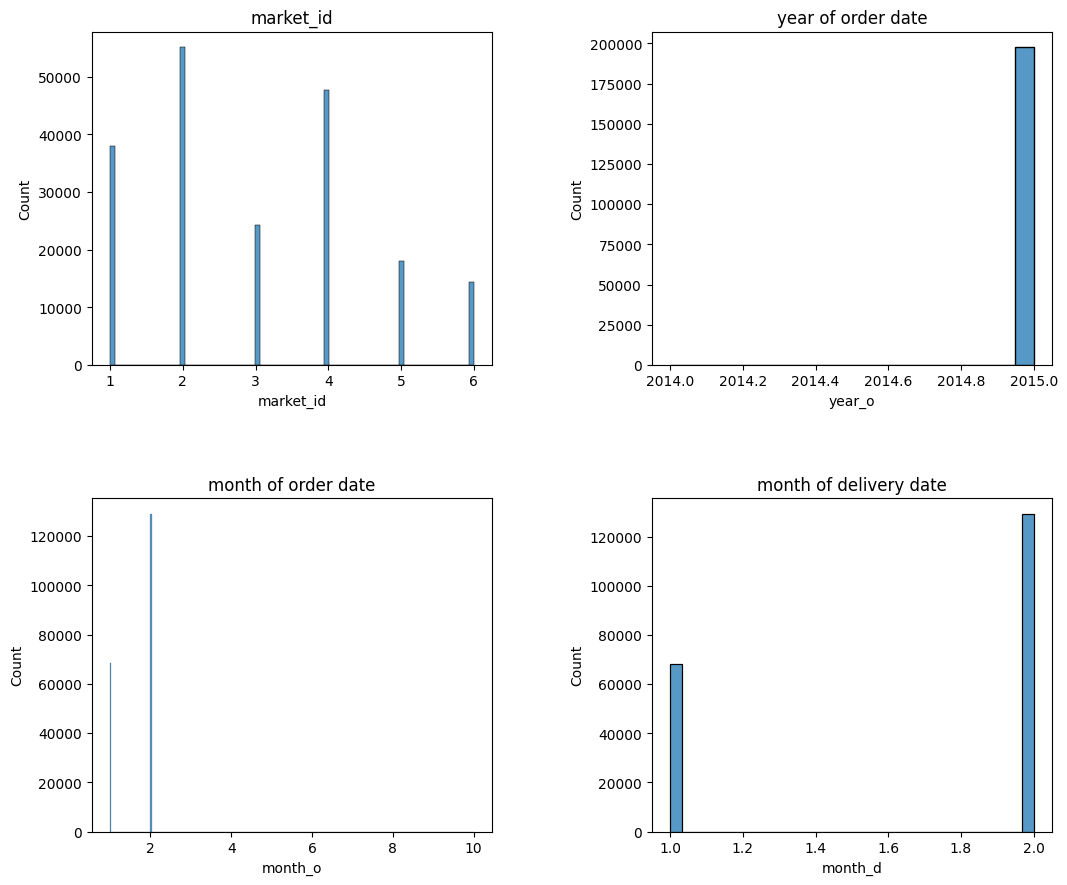

% of orders with market_id
2.0    27.887104
4.0    24.109391
1.0    19.266947
3.0    12.300110
5.0     9.117065
6.0     7.319383
Name: proportion, dtype: float64


% of orders with year_o
2015    99.999493
2014     0.000507
Name: proportion, dtype: float64


% of orders with month_o
2     65.311188
1     34.688306
10     0.000507
Name: proportion, dtype: float64


% of orders with month_d
2    65.43934
1    34.56066
Name: proportion, dtype: float64




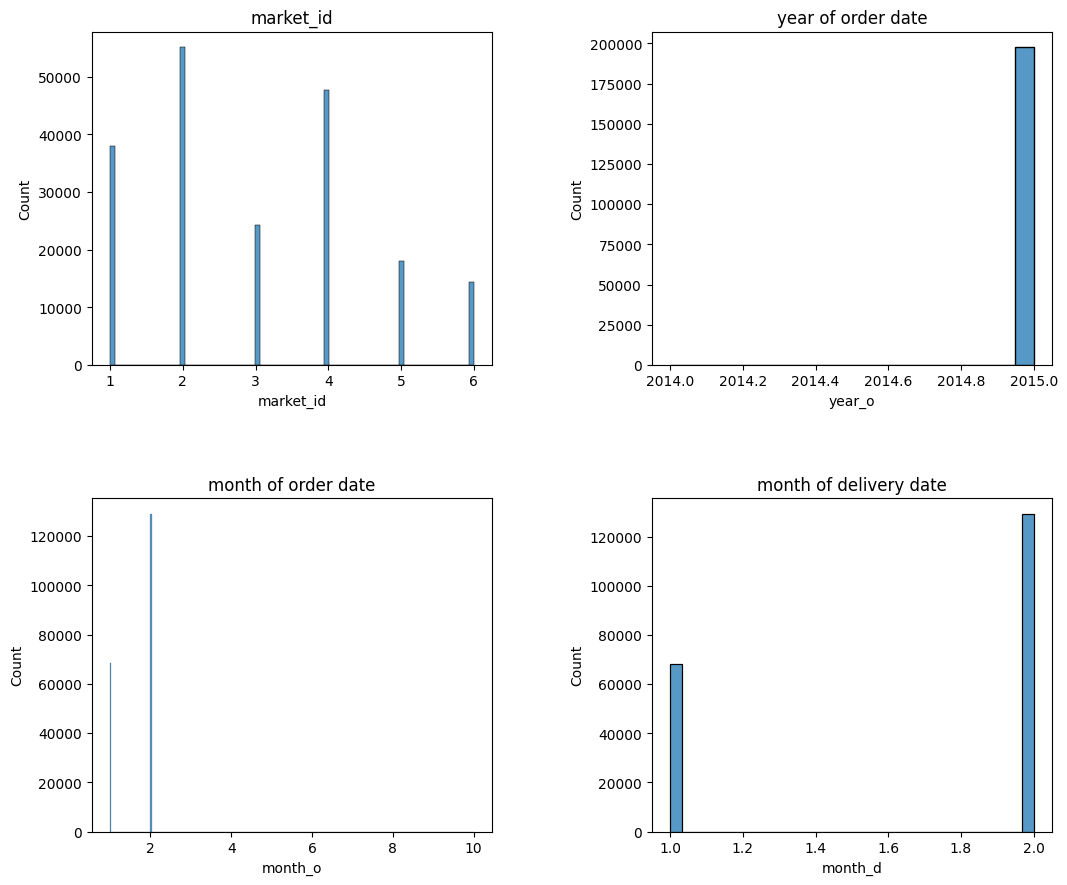

In [78]:
for cols in categ_cols:
    print(f"% of orders with",df1[cols].value_counts(normalize = True)*100)
    print()
    print()

# visualization   
fig, ax = plt.subplots(2,2 ,figsize = (12,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.histplot(df1['market_id'], ax = ax[0,0])
ax[0,0].set_title('market_id')

sns.histplot(df1['year_o'], ax = ax[0,1])
ax[0,1].set_title('year of order date')

sns.histplot(df1['month_o'], ax = ax[1,0])
ax[1,0].set_title('month of order date')


sns.histplot(df1['month_d'], ax = ax[1,1])
ax[1,1].set_title('month of delivery date')


plt.savefig('% of orders with features')
plt.show()

**Observation**
- Most of the order (27.87%) were for the market_id: 2 and least (7.32)% came for market_id: 6.
- All the orders were placed in the year 2015.
- All the orders were placed in the month of January and February. February being the month for maximum orders.
- As it is very likely, month of delivery follows the same patter as of the order placements.

**Which are the top 10 and bottom 10 stores where is business is best/worst ?**

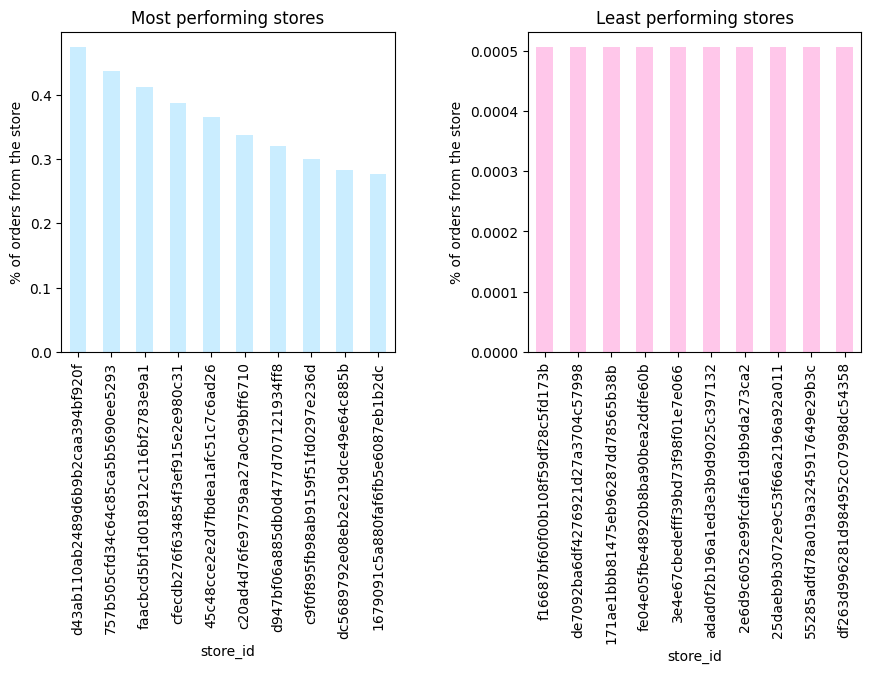

In [196]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
((df['store_id'].value_counts(normalize = True))[:10]*100).plot(kind = "bar", color = '#CAEDFF')
plt.ylabel('% of orders from the store')
plt.title('Most performing stores')

plt.subplot(1,2,2)
((df['store_id'].value_counts(normalize = True))[-10:]*100).plot(kind = "bar", color = '#FFC7EA')
plt.ylabel('% of orders from the store')
plt.title('Least performing stores')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.savefig('Best and worst performing stores')
plt.show()


**What are the store's primary categories of selling that are best/worst for business?**

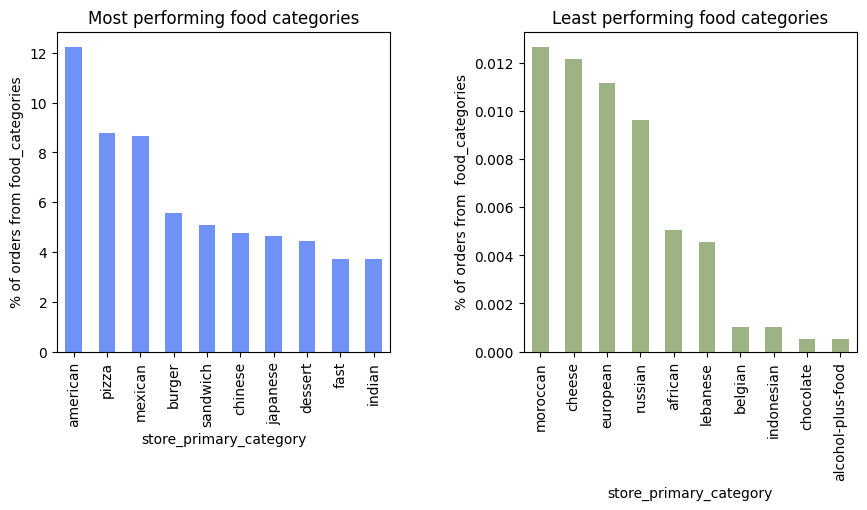

In [197]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
((df['store_primary_category'].value_counts(normalize = True))[:10]*100).plot(kind = "bar", color = '#7091F5')
plt.ylabel('% of orders from food_categories')
plt.title('Most performing food categories')

plt.subplot(1,2,2)
((df['store_primary_category'].value_counts(normalize = True))[-10:]*100).plot(kind = "bar", color = '#9EB384')
plt.ylabel('% of orders from  food_categories')
plt.title('Least performing food categories')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.savefig('Best & Worst performing food categories')
plt.show()

**How the delivery time is varying with price and type of food being ordered?**

In [81]:
top_food_categ = df['store_primary_category'].value_counts()[:10].index

In [ ]:
plt.figure(figsize = (12,4))


plt.subplot(1,2,2)
food_df = df.loc[(df['store_primary_category'].isin(top_food_categ))]
sns.scatterplot(y = food_df['time_taken'],x =  food_df['subtotal'], hue = food_df['store_primary_category'])


plt.subplot(1,2,1)
food_df = df.loc[(df['store_primary_category'].isin(top_food_categ)) & (df['time_taken'] < 1500)]
sns.scatterplot(y = food_df['time_taken'],x =  food_df['subtotal'], hue = food_df['store_primary_category'])

plt.savefig('Delivery time taken vs food categories')
plt.show()

In [83]:
# for statistical description
(df.loc[(df['store_primary_category'].isin(top_food_categ)) & (df['time_taken'] < 1500),['time_taken','subtotal']]).describe()

,time_taken,subtotal
count,121665.000000,121665.000000
mean,47.698442,2579.291925
std,19.472768,1729.704048
min,1.683000,0.000000
25%,34.967000,1379.000000
50%,44.283000,2147.000000
75%,56.383000,3256.000000
max,950.533000,27100.000000


,time_taken,subtotal
count,121665.000000,121665.000000
mean,47.698442,2579.291925
std,19.472768,1729.704048
min,1.683000,0.000000
25%,34.967000,1379.000000
50%,44.283000,2147.000000
75%,56.383000,3256.000000
max,950.533000,27100.000000


**Observation**
- No matter the store category, top 10 food categories takes almost same time.
- Almost all the food categories's subtotal is concentrated in a speicific sub-total ie.e 0 - 15000 dollars.
- Mean and median time taken to deliver the orders by the stores in these top 10 food categories are 47.7 and 44.28 minutes respectively.

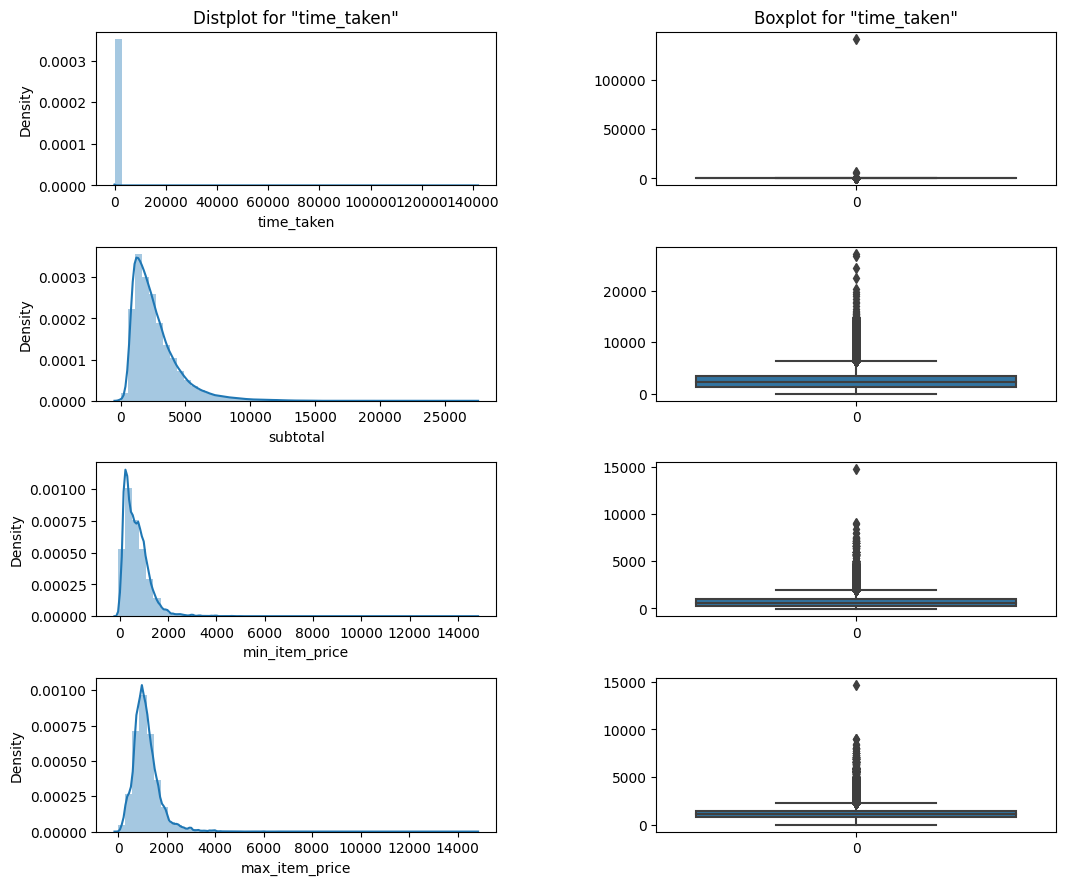

In [176]:
# visualization   
fig, ax = plt.subplots(4,2, figsize = (12,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.distplot(df1['time_taken'], ax = ax[0,0])
ax[0,0].set_title('Distplot for "time_taken"')
sns.boxplot(df1['time_taken'], ax = ax[0,1])
ax[0,1].set_title('Boxplot for "time_taken"')


sns.distplot(df1['subtotal'], ax = ax[1,0])
sns.boxplot(df1['subtotal'], ax = ax[1,1])


sns.distplot(df1['min_item_price'], ax = ax[2,0])
sns.boxplot(df1['min_item_price'], ax = ax[2,1])


sns.distplot(df1['max_item_price'], ax = ax[3,0])
sns.boxplot(df1['max_item_price'], ax = ax[3,1])

plt.savefig('Distribution of numerical columns')
plt.show()

In [85]:
# statistical values
df1[['time_taken','subtotal','min_item_price','max_item_price']].describe()

,time_taken,subtotal,min_item_price,max_item_price
count,197421.000000,197421.000000,197421.000000,197421.000000
mean,48.470955,2682.326379,686.224596,1159.590444
std,320.493482,1823.106256,522.044061,558.416236
min,1.683000,0.000000,-86.000000,0.000000
25%,35.067000,1400.000000,299.000000,800.000000
50%,44.333000,2200.000000,595.000000,1095.000000
75%,56.350000,3395.000000,949.000000,1395.000000
max,141947.650000,27100.000000,14700.000000,14700.000000


,time_taken,subtotal,min_item_price,max_item_price
count,197421.000000,197421.000000,197421.000000,197421.000000
mean,48.470955,2682.326379,686.224596,1159.590444
std,320.493482,1823.106256,522.044061,558.416236
min,1.683000,0.000000,-86.000000,0.000000
25%,35.067000,1400.000000,299.000000,800.000000
50%,44.333000,2200.000000,595.000000,1095.000000
75%,56.350000,3395.000000,949.000000,1395.000000
max,141947.650000,27100.000000,14700.000000,14700.000000


**Observation**
- Mean and median time taken for delivery is 48.47 and 44.33 minutes respectively.
- 50% of the items sold are worth 2200 dollars.
- mean business done is of 2682.32 dollars in the months of given dataset i.e. January and February.

**How the different prices is varying with delivery time?**

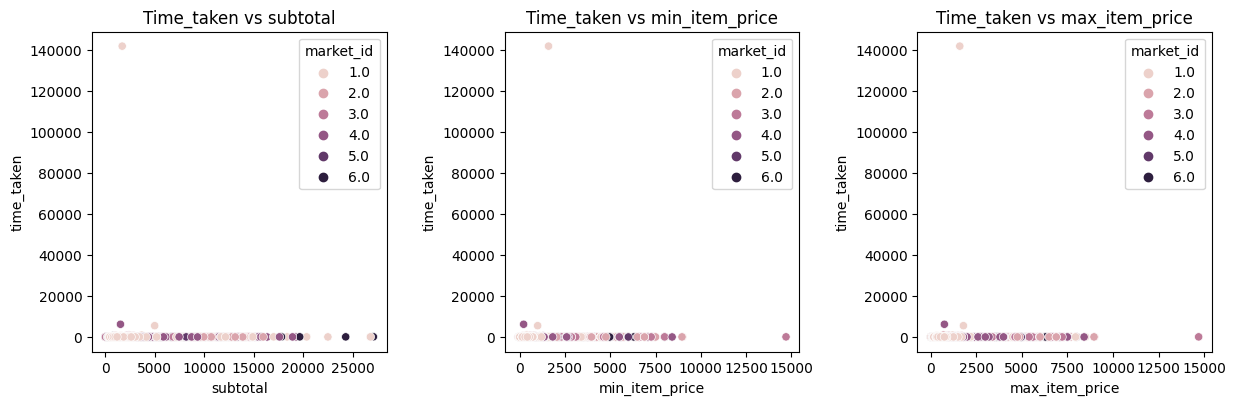

In [177]:
# visualization   
fig, ax = plt.subplots(1,3, figsize = (14,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.scatterplot(data = df1, x = 'subtotal', y = 'time_taken' ,ax = ax[0], hue = 'market_id')
ax[0].set_title('Time_taken vs subtotal')

sns.scatterplot(data = df1, x = 'min_item_price', y = 'time_taken', ax = ax[1], hue = 'market_id')
ax[1].set_title('Time_taken vs min_item_price')

sns.scatterplot(data = df1, x = 'max_item_price', y = 'time_taken', ax = ax[2], hue = 'market_id')
ax[2].set_title('Time_taken vs max_item_price')

plt.savefig('time_taken vs different prices')
plt.show()

After removing the outlier case, the visualization will be like:

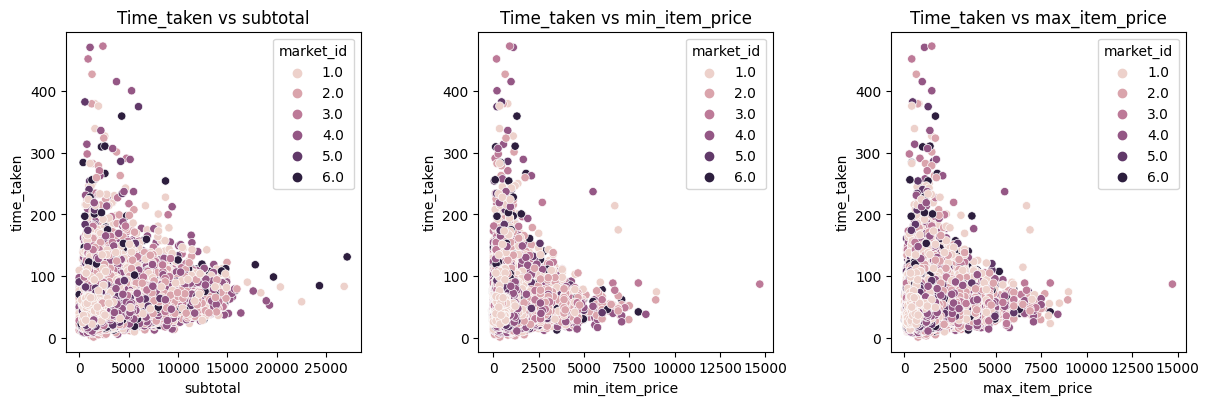

In [178]:
# visualization   
fig, ax = plt.subplots(1,3, figsize = (14,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.scatterplot(data = df1.loc[df1['time_taken']<500], x = 'subtotal', y = 'time_taken' ,ax = ax[0], hue = 'market_id')
ax[0].set_title('Time_taken vs subtotal')

sns.scatterplot(data = df1.loc[df1['time_taken']<500], x = 'min_item_price', y = 'time_taken', ax = ax[1], hue = 'market_id')
ax[1].set_title('Time_taken vs min_item_price')

sns.scatterplot(data = df1.loc[df1['time_taken']<500], x = 'max_item_price', y = 'time_taken', ax = ax[2], hue = 'market_id')
ax[2].set_title('Time_taken vs max_item_price')

plt.savefig('Time_taken vs subtotal, min_item_price, max_item_price')
plt.show()

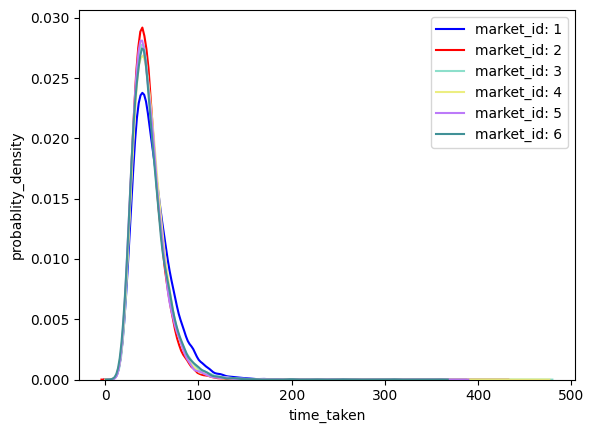

In [179]:
sns.kdeplot(data = df1.loc[(df1['time_taken']<500) & (df1['market_id'] == 1), 'time_taken'] ,color='b', shade=False, label='market_id: 1')
sns.kdeplot(data = df1.loc[(df1['time_taken']<500) & (df1['market_id'] == 2), 'time_taken'],color='r', shade=False, label='market_id: 2')
sns.kdeplot(data = df1.loc[(df1['time_taken']<500) & (df1['market_id'] == 3), 'time_taken'],color='#8DDFCB', shade=False, label='market_id: 3')
sns.kdeplot(data = df1.loc[(df1['time_taken']<500) & (df1['market_id'] == 4), 'time_taken'],color='#ECEE81', shade=False, label='market_id: 4')
sns.kdeplot(data = df1.loc[(df1['time_taken']<500) & (df1['market_id'] == 5), 'time_taken'],color='#BC7AF9', shade=False, label='market_id: 5')
sns.kdeplot(data = df1.loc[(df1['time_taken']<500) & (df1['market_id'] == 6), 'time_taken'],color='#419197', shade=False, label='market_id: 6')
plt.xlabel('time_taken')
plt.ylabel('probablity_density')

plt.legend()

plt.savefig('Distribution of delivery time from store located in different markets')
plt.show()


**Comparing the performance of different markets based on the available features.**

In [89]:
market_df = df[['market_id','store_id','total_items','subtotal','num_distinct_items','time_taken','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']].groupby('market_id').agg(
    store_count = ('store_id','count'),
    time_taken = ('time_taken','mean'),
    total_items = ('total_items','mean'),
    sub_total  = ('subtotal','mean'),
    num_distinct_items = ('num_distinct_items','mean'),
    max_item_price = ('max_item_price','max'),
    total_onshift_partners = ('total_onshift_partners', 'mean'),
    total_busy_partners = ('total_outstanding_orders','mean')
).reset_index()

market_df

,market_id,store_count,time_taken,total_items,sub_total,num_distinct_items,max_item_price,total_onshift_partners,total_busy_partners
0,1.0,38037,55.206462,3.258301,2744.386729,2.692983,8999,24.276783,30.292137
1,2.0,55055,46.073661,3.132304,2632.495305,2.607338,8959,62.462356,81.692925
2,3.0,24283,47.706253,3.151258,2579.743195,2.635548,14700,21.097640,22.627558
3,4.0,47597,47.366463,3.336828,2896.337185,2.803412,8415,60.358006,82.064563
4,5.0,17999,46.495434,3.069893,2412.010167,2.584255,6795,23.976999,26.304961
5,6.0,14450,47.258623,3.048097,2512.986367,2.584152,7999,37.359446,41.790519


,market_id,store_count,time_taken,total_items,sub_total,num_distinct_items,max_item_price,total_onshift_partners,total_busy_partners
0,1.0,38037,55.206462,3.258301,2744.386729,2.692983,8999,24.276783,30.292137
1,2.0,55055,46.073661,3.132304,2632.495305,2.607338,8959,62.462356,81.692925
2,3.0,24283,47.706253,3.151258,2579.743195,2.635548,14700,21.097640,22.627558
3,4.0,47597,47.366463,3.336828,2896.337185,2.803412,8415,60.358006,82.064563
4,5.0,17999,46.495434,3.069893,2412.010167,2.584255,6795,23.976999,26.304961
5,6.0,14450,47.258623,3.048097,2512.986367,2.584152,7999,37.359446,41.790519


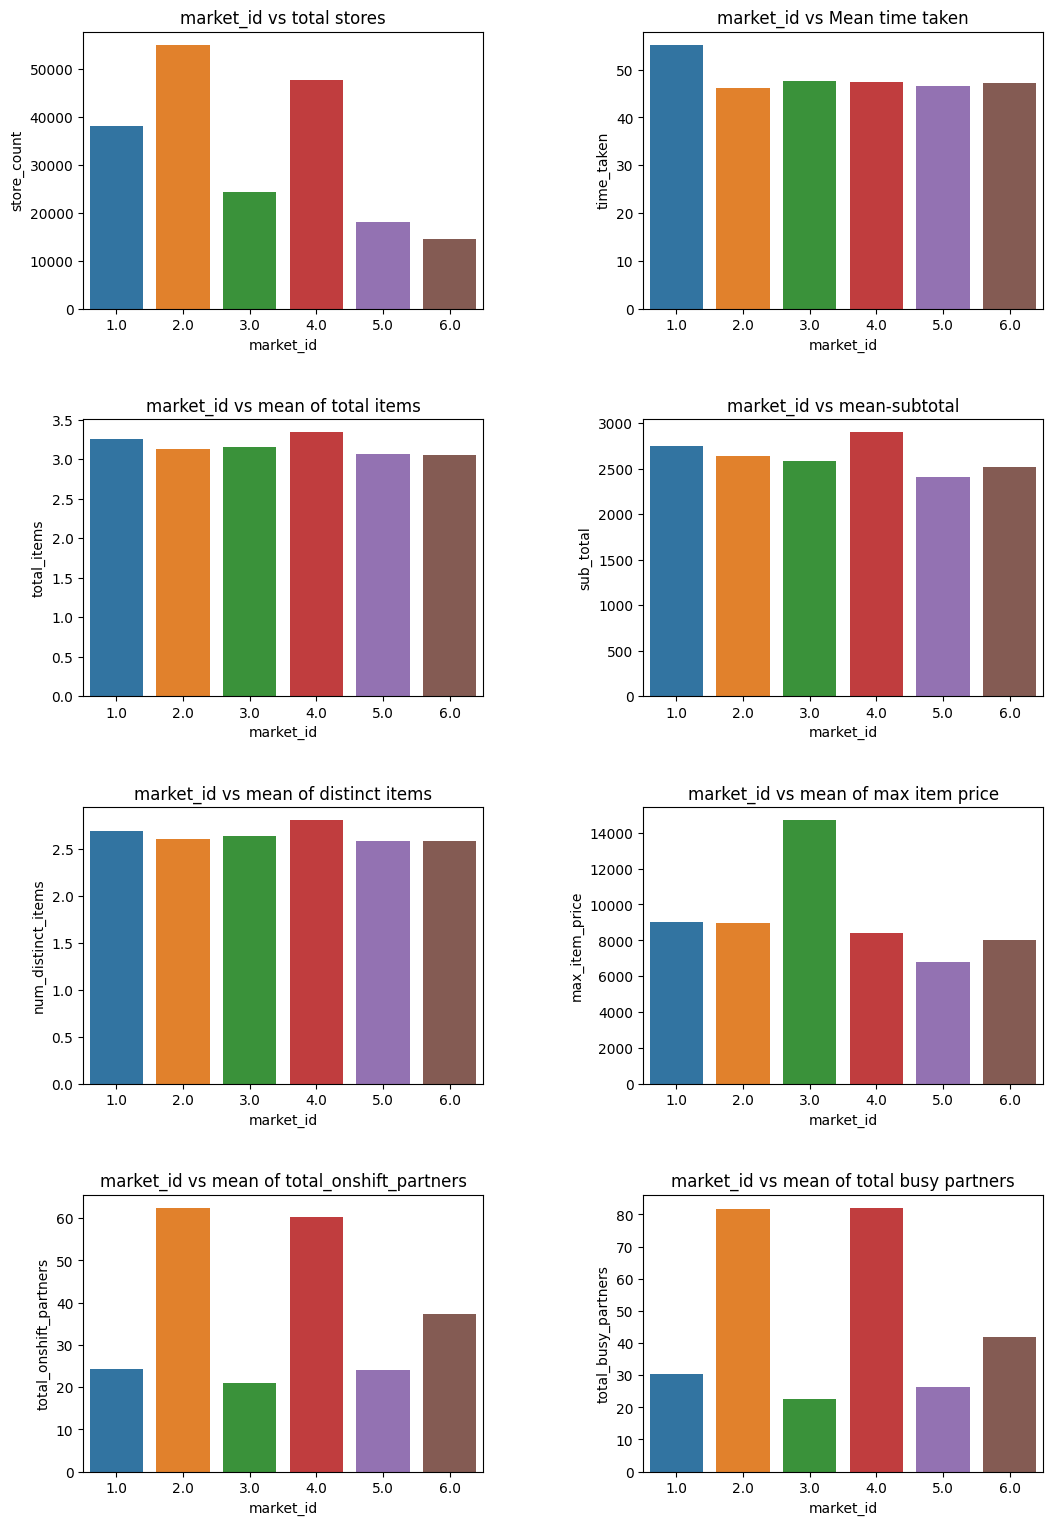

In [180]:
fig,axs = plt.subplots(4,2, figsize = (12,18))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.barplot(data = market_df, x = 'market_id',y = 'store_count', ax = axs[0,0])
axs[0,0].set_title('market_id vs total stores')

sns.barplot(data = market_df, x = 'market_id',y = 'time_taken', ax = axs[0,1])
axs[0,1].set_title('market_id vs Mean time taken')

sns.barplot(data = market_df, x = 'market_id',y = 'total_items', ax = axs[1,0])
axs[1,0].set_title('market_id vs mean of total items')

sns.barplot(data = market_df, x = 'market_id',y = 'sub_total', ax = axs[1,1])
axs[1,1].set_title('market_id vs mean-subtotal')

sns.barplot(data = market_df, x = 'market_id',y = 'num_distinct_items', ax = axs[2,0])
axs[2,0].set_title('market_id vs mean of distinct items')

sns.barplot(data = market_df, x = 'market_id',y = 'max_item_price', ax = axs[2,1])
axs[2,1].set_title('market_id vs mean of max item price')

sns.barplot(data = market_df, x = 'market_id',y = 'total_onshift_partners', ax = axs[3,0])
axs[3,0].set_title('market_id vs mean of total_onshift_partners')

sns.barplot(data = market_df, x = 'market_id',y = 'total_busy_partners', ax = axs[3,1])
axs[3,1].set_title('market_id vs mean of total busy partners')

plt.savefig('market_id vs other features')
plt.show()

**Observation**
- Market with id = 2 has the max number of stores followed by market = 4. Market 6 has least number of stores.
- Stores in market 2 takes least time to deliver their food and market 1 takes the most time. However, it should be noted that there is not very significant difference.
- Total items ordered are maximum for the stores located in market 4 followed by 1.
- Subtotal is max for market 4 followed by 1 and least is for 5.
- Total number of distinct items ordered were from the market 4.
- Market 3 has the products with max price.
- TOtal onshift partners are max for market 2 and followed by 4 and is least for market 3
- TOtal busy partners are max for market 4 and 2 and least for market 3.


**Comparing the performance of different food categories based on the available features.**

In [91]:
top_food_categ

Index(['american', 'pizza', 'mexican', 'burger', 'sandwich', 'chinese',
       'japanese', 'dessert', 'fast', 'indian'],
      dtype='object', name='store_primary_category')

Index(['american', 'pizza', 'mexican', 'burger', 'sandwich', 'chinese',
       'japanese', 'dessert', 'fast', 'indian'],
      dtype='object', name='store_primary_category')

In [92]:
food_categ_df = df.loc[df['store_primary_category'].isin(top_food_categ),['store_primary_category','store_id','total_items','subtotal','num_distinct_items','time_taken','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']].groupby('store_primary_category').agg(
    store_count = ('store_id','count'),
    time_taken = ('time_taken','mean'),
    total_items = ('total_items','mean'),
    sub_total  = ('subtotal','mean'),
    num_distinct_items = ('num_distinct_items','mean'),
    max_item_price = ('max_item_price','max'),
    total_onshift_partners = ('total_onshift_partners', 'mean'),
    total_busy_partners = ('total_outstanding_orders','mean')
).reset_index()

food_categ_df

,store_primary_category,store_count,time_taken,total_items,sub_total,num_distinct_items,max_item_price,total_onshift_partners,total_busy_partners
0,american,24159,47.948325,2.858272,2684.286105,2.503746,8959,37.469349,46.747547
1,burger,10958,47.175412,3.176675,2215.532305,2.674758,4395,45.227323,57.308359
2,chinese,9421,48.067652,3.424159,2868.265895,3.065810,8415,48.378728,61.855642
3,dessert,8772,48.791451,2.803010,2437.024054,2.390105,7080,45.743958,59.130187
4,fast,7371,43.853610,5.486501,1592.254240,3.078551,6395,32.051689,39.018722
5,indian,7314,49.735509,4.006973,2907.434099,3.288761,4643,49.393082,65.725595
6,japanese,9195,52.077582,3.913214,3360.829799,3.307015,7500,44.183687,57.097553
7,mexican,17098,44.546865,3.160019,2295.449468,2.524857,7950,46.500058,59.193590
8,pizza,17320,50.869163,2.543533,3007.514030,2.282159,8999,47.927945,62.133199
9,sandwich,10059,44.760699,2.865394,2092.357690,2.432548,4699,36.233820,44.284024


,store_primary_category,store_count,time_taken,total_items,sub_total,num_distinct_items,max_item_price,total_onshift_partners,total_busy_partners
0,american,24159,47.948325,2.858272,2684.286105,2.503746,8959,37.469349,46.747547
1,burger,10958,47.175412,3.176675,2215.532305,2.674758,4395,45.227323,57.308359
2,chinese,9421,48.067652,3.424159,2868.265895,3.065810,8415,48.378728,61.855642
3,dessert,8772,48.791451,2.803010,2437.024054,2.390105,7080,45.743958,59.130187
4,fast,7371,43.853610,5.486501,1592.254240,3.078551,6395,32.051689,39.018722
5,indian,7314,49.735509,4.006973,2907.434099,3.288761,4643,49.393082,65.725595
6,japanese,9195,52.077582,3.913214,3360.829799,3.307015,7500,44.183687,57.097553
7,mexican,17098,44.546865,3.160019,2295.449468,2.524857,7950,46.500058,59.193590
8,pizza,17320,50.869163,2.543533,3007.514030,2.282159,8999,47.927945,62.133199
9,sandwich,10059,44.760699,2.865394,2092.357690,2.432548,4699,36.233820,44.284024


In [93]:
food_categ_df.describe()

,store_count,time_taken,total_items,sub_total,num_distinct_items,max_item_price,total_onshift_partners,total_busy_partners
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12166.700000,47.782627,3.423775,2546.094768,2.754831,6903.500000,43.310964,55.249442
std,5528.050974,2.755230,0.866467,519.597945,0.390746,1792.074667,5.920740,8.787667
min,7314.000000,43.853610,2.543533,1592.254240,2.282159,4395.000000,32.051689,39.018722
25%,8877.750000,45.364377,2.860053,2235.511596,2.450347,5123.000000,39.147933,49.335049
50%,9740.000000,48.007988,3.168347,2560.655079,2.599807,7290.000000,45.485640,58.219273
75%,15563.000000,49.499495,3.790950,2897.642048,3.075366,8298.750000,47.570973,61.190129
max,24159.000000,52.077582,5.486501,3360.829799,3.307015,8999.000000,49.393082,65.725595


,store_count,time_taken,total_items,sub_total,num_distinct_items,max_item_price,total_onshift_partners,total_busy_partners
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12166.700000,47.782627,3.423775,2546.094768,2.754831,6903.500000,43.310964,55.249442
std,5528.050974,2.755230,0.866467,519.597945,0.390746,1792.074667,5.920740,8.787667
min,7314.000000,43.853610,2.543533,1592.254240,2.282159,4395.000000,32.051689,39.018722
25%,8877.750000,45.364377,2.860053,2235.511596,2.450347,5123.000000,39.147933,49.335049
50%,9740.000000,48.007988,3.168347,2560.655079,2.599807,7290.000000,45.485640,58.219273
75%,15563.000000,49.499495,3.790950,2897.642048,3.075366,8298.750000,47.570973,61.190129
max,24159.000000,52.077582,5.486501,3360.829799,3.307015,8999.000000,49.393082,65.725595


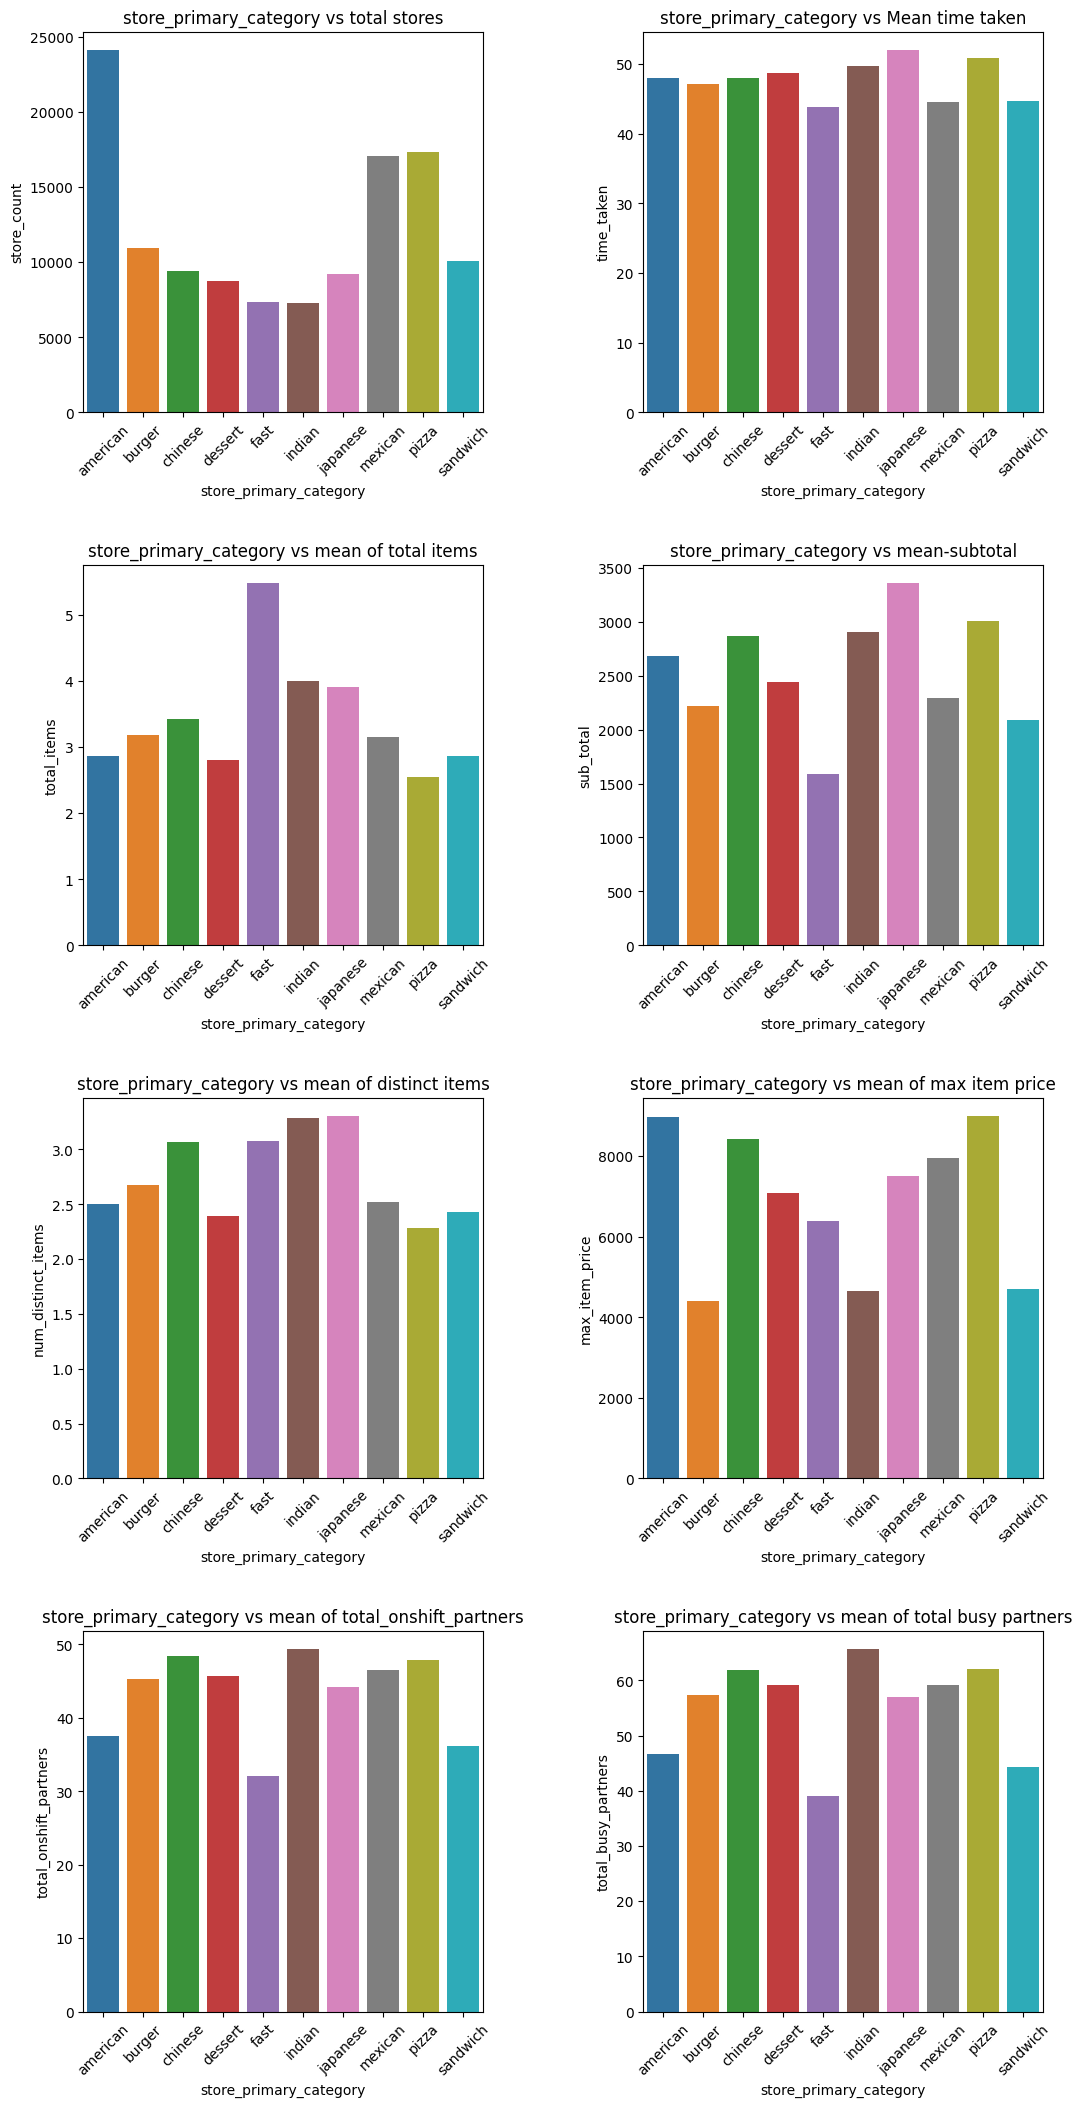

In [181]:
fig,axs = plt.subplots(4,2, figsize = (12,18))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'store_count', ax = axs[0,0])
axs[0,0].set_title('store_primary_category vs total stores')
axs[0,0].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'time_taken', ax = axs[0,1])
axs[0,1].set_title('store_primary_category vs Mean time taken')
axs[0,1].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'total_items', ax = axs[1,0])
axs[1,0].set_title('store_primary_category vs mean of total items')
axs[1,0].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'sub_total', ax = axs[1,1])
axs[1,1].set_title('store_primary_category vs mean-subtotal')
axs[1,1].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'num_distinct_items', ax = axs[2,0])
axs[2,0].set_title('store_primary_category vs mean of distinct items')
axs[2,0].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'max_item_price', ax = axs[2,1])
axs[2,1].set_title('store_primary_category vs mean of max item price')
axs[2,1].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'total_onshift_partners', ax = axs[3,0])
axs[3,0].set_title('store_primary_category vs mean of total_onshift_partners')
axs[3,0].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

sns.barplot(data = food_categ_df, x = 'store_primary_category',y = 'total_busy_partners', ax = axs[3,1])
axs[3,1].set_title('store_primary_category vs mean of total busy partners')
axs[3,1].set_xticklabels(sorted(list(top_food_categ)),rotation = 45)

plt.savefig('Store_primary_categry vs other features')
plt.show()

**Observation**
- Maximum number of stores are for 'american' food, followed by 'pizza' and 'mexican' categories. Least number of stores are for *fast* and *Indian*, among the popular food categories.
- Time takes to deliver food is highest among japanese stores, followed by pizza and indian food stores.
- Total number of items offered is max for the category of *fast* and least for *pizza*.
- *Japanese* food comes first in terms of business followed by *pizza* and *indian*.
- In terms of number of items being ordered *Japanese* and *Indians* stores are at the top.
- Most expensive food items belong to the category of *pizza* and *american*. While *fast* and *Indian* have the least expensive items available among all the top 10 food categories.
- Total onshift partners are max for *Indian* restaruants and mininmum for *fast* stores.
- TOtal busy partners are max for *Indian* and least for *fast*.

**what food category stores are most prominent in each market?**

In [95]:
food_market_df = df.loc[df['store_primary_category'].isin(top_food_categ),['market_id','store_primary_category']]

print(food_market_df.groupby(['market_id'])['store_primary_category'].agg(pd.Series.mode))


market_id
1.0    american
2.0    american
3.0    american
4.0       pizza
5.0    american
6.0    american
Name: store_primary_category, dtype: object
market_id
1.0    american
2.0    american
3.0    american
4.0       pizza
5.0    american
6.0    american
Name: store_primary_category, dtype: object


5 of the markets have 'american' restaurants as most common followed by 'pizza'.

**Sales on each day**

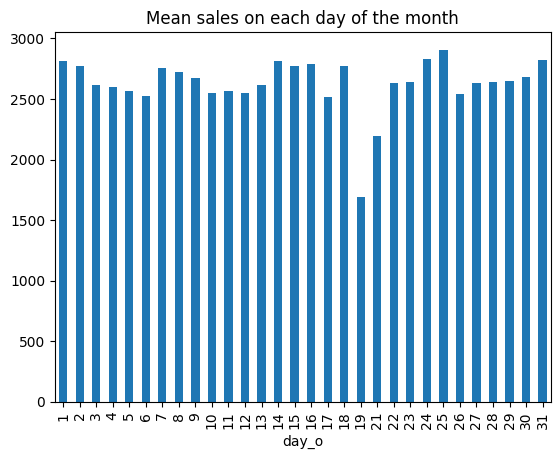

In [182]:
(df.groupby(['day_o'])['subtotal'].mean()).plot(kind = 'bar')
plt.title('Mean sales on each day of the month')

plt.savefig('Mean_sales on each day of month')
plt.show()

**Sales on each hour**

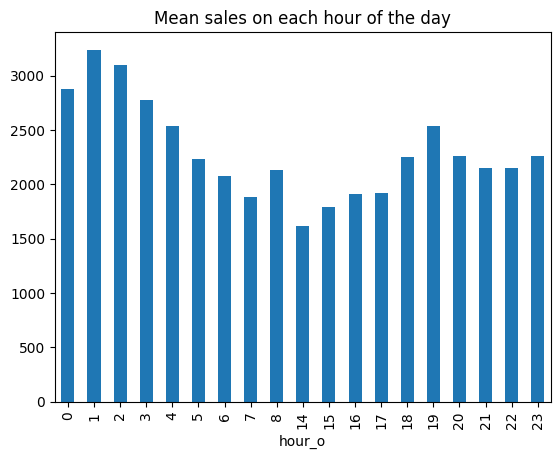

In [183]:
(df.groupby(['hour_o'])['subtotal'].mean()).plot(kind = 'bar')
plt.title('Mean sales on each hour of the day')
plt.savefig('Mean sales on each hour of day')
plt.show()

People like to order food late at night.

**Sales on each weekday**

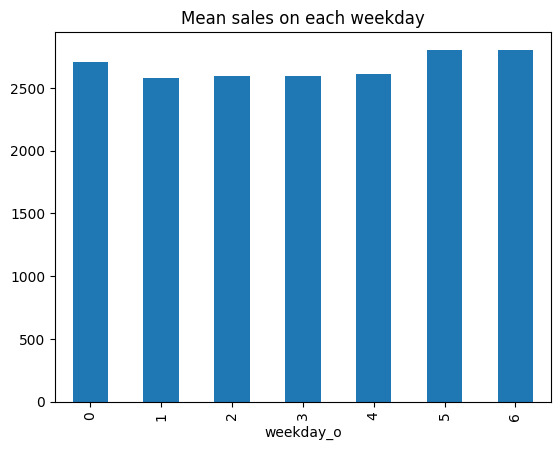

In [191]:
(df.groupby(['weekday_o'])['subtotal'].mean()).plot(kind = 'bar')
plt.title('Mean sales on each weekday')
plt.savefig('Mean sales of each weekday')
plt.show()

On weekends people like order food more.

**correlation among features**

In [184]:
df1.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_taken', 'year_o', 'month_o', 'day_o',
       'hour_o', 'minute_o', 'second_o', 'weekday_o', 'month_d', 'day_d',
       'hour_d', 'minute_d', 'second_d', 'weekday_d'],
      dtype='object')

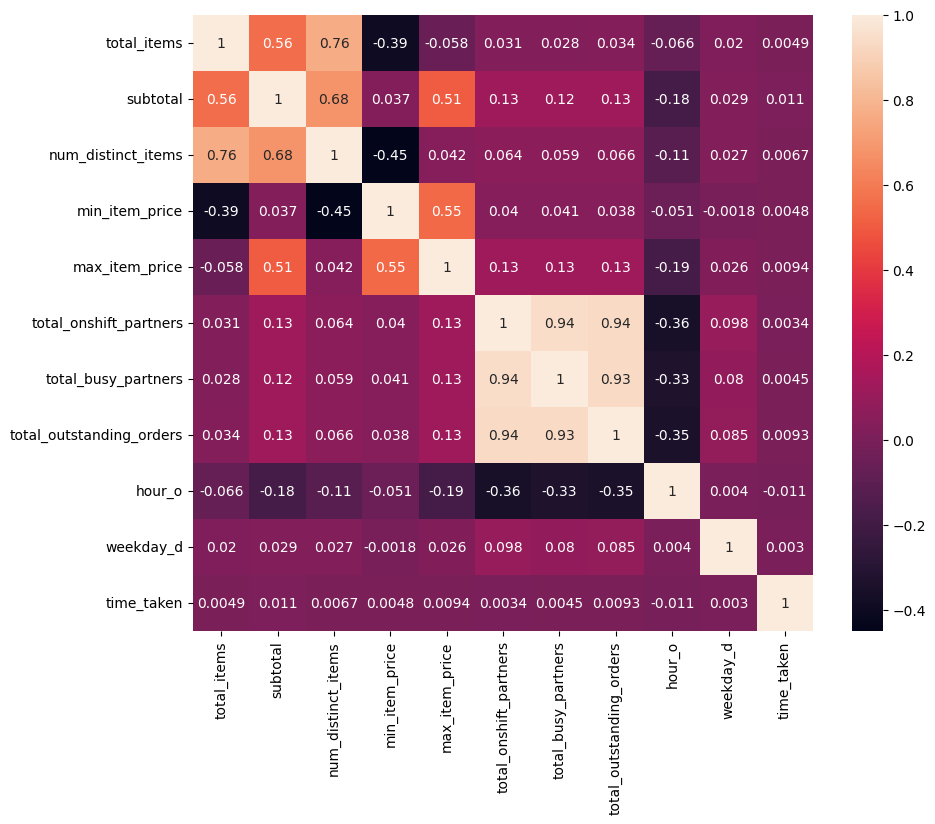

In [189]:
plt.figure(figsize = (10,8))
df_1 = df1[['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners',
           'total_outstanding_orders','hour_o','weekday_d','time_taken']]
sns.heatmap(df_1.corr(), annot = True )
plt.savefig('Heatmap for Correlation ')
plt.show()

**Observation**
- The delivery time is not showing any correlation with any of the features.
- *Subtotal* is showing a slight positive correlation with *num_distinct_items*.
- *total_onshift_partners* are strongly positively correlated with *total_outstanding_orders* and *total_busy_partners*.
- *total_busy_partners* are strongly positively correlated with *total_outstanding_partners* and *total_onshift_parnters*.

### 4. Outlier detection and handling

We will detect and remove the outliers using IQR method. We will remove the outliers from *time_taken*, *subtotal*, *min_item_price* and *max_item_price*.

In [99]:
df2 = df1.copy()

In [100]:
df2.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_taken', 'year_o', 'month_o', 'day_o',
       'hour_o', 'minute_o', 'second_o', 'weekday_o', 'month_d', 'day_d',
       'hour_d', 'minute_d', 'second_d', 'weekday_d'],
      dtype='object')

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_taken', 'year_o', 'month_o', 'day_o',
       'hour_o', 'minute_o', 'second_o', 'weekday_o', 'month_d', 'day_d',
       'hour_d', 'minute_d', 'second_d', 'weekday_d'],
      dtype='object')

**Outlier Detection**

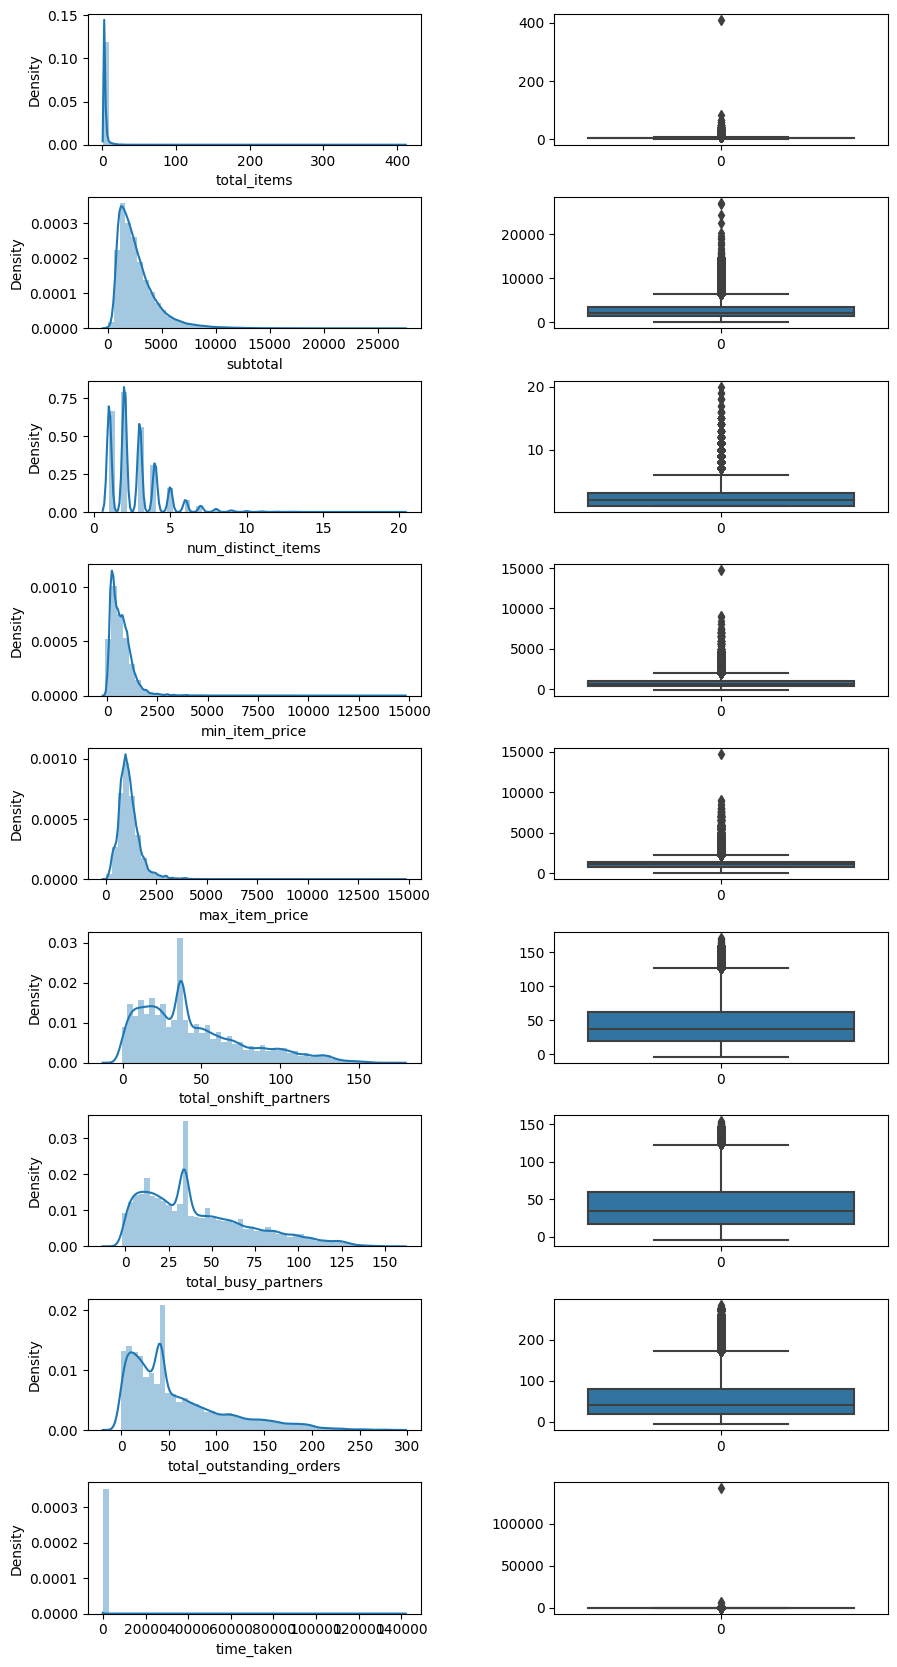

In [192]:

fig,ax = plt.subplots(9,2, figsize = (10,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.distplot(df1['total_items'], ax = ax[0,0])
sns.boxplot(df1['total_items'], ax = ax[0,1])

sns.distplot(df1['subtotal'], ax = ax[1,0])
sns.boxplot(df1['subtotal'], ax = ax[1,1])

sns.distplot(df1['num_distinct_items'], ax = ax[2,0])
sns.boxplot(df1['num_distinct_items'], ax = ax[2,1])

sns.distplot(df1['min_item_price'], ax = ax[3,0])
sns.boxplot(df1['min_item_price'], ax = ax[3,1])

sns.distplot(df1['max_item_price'], ax = ax[4,0])
sns.boxplot(df1['max_item_price'], ax = ax[4,1])

sns.distplot(df1['total_onshift_partners'], ax = ax[5,0])
sns.boxplot(df1['total_onshift_partners'], ax = ax[5,1])

sns.distplot(df1['total_busy_partners'], ax = ax[6,0])
sns.boxplot(df1['total_busy_partners'], ax = ax[6,1])

sns.distplot(df1['total_outstanding_orders'], ax = ax[7,0])
sns.boxplot(df1['total_outstanding_orders'], ax = ax[7,1])

sns.distplot(df1['time_taken'], ax = ax[8,0])
sns.boxplot(df1['time_taken'], ax = ax[8,1])

plt.savefig('Outliers Detection using distplot and boxplot')
plt.show()


**Outlier removal via IQR**

In [193]:
# col: time_taken
q1 = df2['time_taken'].quantile(0.25)
q3 = df2['time_taken'].quantile(0.75)
iqr = q3 - q1

df2 = df2[(df2['time_taken'] >= q1 - 1.5*iqr) & (df2['time_taken'] <= q3 + 1.5*iqr)]

# % drop of rows
print('% drop after dropping outliers in "time_taken":  ',(df.shape[0] - df2.shape[0])*100/df.shape[0])

#subtotal
q1 = df2['subtotal'].quantile(0.25)
q3 = df2['subtotal'].quantile(0.75)
iqr = q3 - q1

df2 = df2[(df2['subtotal'] >= q1 - 1.5*iqr) & (df2['subtotal'] <= q3 + 1.5*iqr)]

# % drop of rows
print('% drop after dropping outliers in "sub_total":  ',(df.shape[0] - df2.shape[0])*100/df.shape[0])



# # min_item_price
# q1 = df2['min_item_price'].quantile(0.25)
# q3 = df2['min_item_price'].quantile(0.75)
# iqr = q3 - q1

# df2 = df2[(df2['min_item_price'] >= q1 - 1.5*iqr) & (df2['min_item_price'] <= q3 + 1.5*iqr)]

# # % drop of rows
# print('% drop in rows',(df2.shape[0] - df2.shape[0])*100/df2.shape[0])

# # max_item_price
# q1 = df2['max_item_price'].quantile(0.25)
# q3 = df2['max_item_price'].quantile(0.75)
# iqr = q3 - q1

# df2 = df2[(df2['max_item_price'] >= q1 - 1.5*iqr) & (df2['max_item_price'] <= q3 + 1.5*iqr)]

# # % drop of rows
# print('% drop in rows',(df2.shape[0] - df2.shape[0])*100/df2.shape[0])

% drop after dropping outliers in "time_taken":   8.451988390292826
% drop after dropping outliers in "sub_total":   9.808986885893598


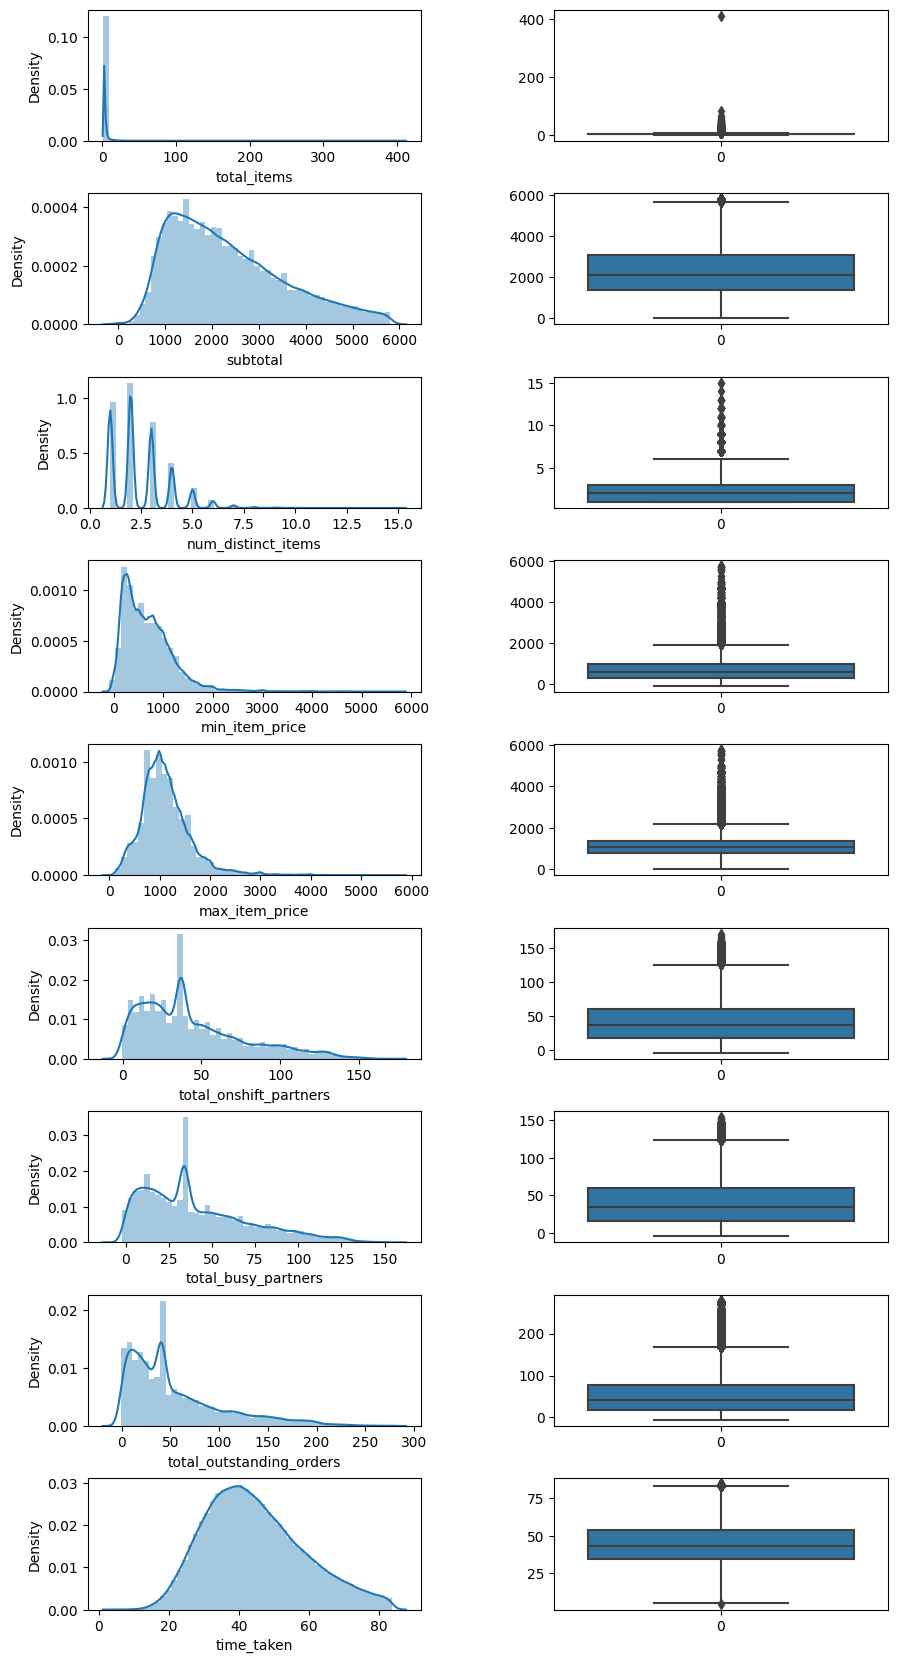

In [194]:
# visualization of data after outlier removal
fig,ax = plt.subplots(9,2, figsize = (10,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.distplot(df2['total_items'], ax = ax[0,0])
sns.boxplot(df2['total_items'], ax = ax[0,1])

sns.distplot(df2['subtotal'], ax = ax[1,0])
sns.boxplot(df2['subtotal'], ax = ax[1,1])

sns.distplot(df2['num_distinct_items'], ax = ax[2,0])
sns.boxplot(df2['num_distinct_items'], ax = ax[2,1])

sns.distplot(df2['min_item_price'], ax = ax[3,0])
sns.boxplot(df2['min_item_price'], ax = ax[3,1])

sns.distplot(df2['max_item_price'], ax = ax[4,0])
sns.boxplot(df2['max_item_price'], ax = ax[4,1])

sns.distplot(df2['total_onshift_partners'], ax = ax[5,0])
sns.boxplot(df2['total_onshift_partners'], ax = ax[5,1])

sns.distplot(df2['total_busy_partners'], ax = ax[6,0])
sns.boxplot(df2['total_busy_partners'], ax = ax[6,1])

sns.distplot(df2['total_outstanding_orders'], ax = ax[7,0])
sns.boxplot(df2['total_outstanding_orders'], ax = ax[7,1])

sns.distplot(df2['time_taken'], ax = ax[8,0])
sns.boxplot(df2['time_taken'], ax = ax[8,1])

plt.savefig('Distribution after outlier removal')
plt.show()

Plots looked better in terms of normality  but not good enough to consider them normally distributed. 

### 4. Train and Test split of data

In [105]:
X = df2.drop('time_taken', axis = 1)
y = df2['time_taken']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### 5. Modelling

#### 5.1 Random Forest Regressor

In [173]:
start_time = time.time()



# building the basic regression model with Random Forest
model_reg = RandomForestRegressor()

# fitting
model_reg.fit(X_train,y_train)

y_pred_srfr = model_reg.predict(X_test)

end_time = time.time()
print((end_time - start_time )/60, 'minutes')

8.937333965301514 minutes


In [140]:
# evaluation
from sklearn import metrics as smetrics
mae_rfr = smetrics.mean_absolute_error(y_test, y_pred_srfr)
mse_rfr = smetrics.mean_squared_error(y_test, y_pred_srfr)
rmse_rfr = np.sqrt(smetrics.mean_squared_error(y_test, y_pred_srfr))

print('Mean Absolute Error:',mae_rfr )
print('Mean Squared Error:', mse_rfr)
print('Root Mean Squared Error:', rmse_rfr)

Mean Absolute Error: 3.1842367785142986
Mean Squared Error: 32.55313082977181
Root Mean Squared Error: 5.70553510459552


**Hyperparametric Tuning of the model**

In [166]:
start_time = time.time() # starting time

params = {
    "n_estimators": [40,50,60],
    "max_depth" : [9,13,16,20],
    
}

rfr = RandomForestRegressor(n_jobs = -1)
model_reg2 = RandomizedSearchCV(rfr, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

#fitting the model
model_reg2.fit(X_train_scaled, y_train)


end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time}")# total time taken

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Execution time: 1669.0887703895569


In [167]:
model_reg2.best_params_

{'n_estimators': 50, 'max_depth': 9}

In [168]:
start_time = time.time()

# building regression model with Random Forest
model_reg2 = RandomForestRegressor(n_estimators = 50,max_depth = 9,random_state = 16)

# fitting
model_reg2.fit(X_train,y_train)

end_time = time.time()
print((end_time - start_time )/60, 'minutes')

1.4352019071578979 minutes


In [169]:
y_pred_trfr = model_reg2.predict(X_test)

**Evaluation**

In [170]:

# evaluation
from sklearn import metrics as smetrics
mae_rfr_t = smetrics.mean_absolute_error(y_test, y_pred_trfr)
mse_rfr_t = smetrics.mean_squared_error(y_test, y_pred_trfr)
rmse_rfr_t = np.sqrt(smetrics.mean_squared_error(y_test, y_pred_trfr))

print('Mean Absolute Error:',mae_rfr_t )
print('Mean Squared Error:', mse_rfr_t)
print('Root Mean Squared Error:', rmse_rfr_t)

Mean Absolute Error: 8.267639560943053
Mean Squared Error: 118.84317090251635
Root Mean Squared Error: 10.901521494842651


#### 5.2 Neural Network

**Scaling**

In [113]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


In [114]:
den = y_train.max() - y_train.min()
y_train_scaled = (y_train - y_train.min())/den
y_test_scaled = (y_test - y_train.min())/den

**Building Neural network**

In [115]:
# Keras callback for early stopping: EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

**MODEL 1**

In [198]:
hidden_units1 = 92668 # 2/3 of total train record count
model1 = keras.Sequential(
layers = [
    layers.Dense(units = hidden_units1, activation = 'relu', kernel_regularizer = regularizers.L1(1e-5)),
    BatchNormalization(),
    Dropout(0.4),
    layers.Dense(1, activation = 'linear')
]
)

In [199]:
# compiling the model
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])

In [200]:
start_time = time.time()
# training
history1 = model1.fit(X_train_scaled, y_train_scaled, epochs=30,
                     validation_split=0.25, callbacks = [early_stop])

end_time = time.time()
print((end_time - start_time )/60, 'minutes')

Epoch 1/30
3423/3423 [==============================] - 952s 277ms/step - loss: 0.2224 - mean_absolute_error: 0.1818 - val_loss: 0.0434 - val_mean_absolute_error: 0.1355
Epoch 2/30
3423/3423 [==============================] - 987s 288ms/step - loss: 0.0369 - mean_absolute_error: 0.1265 - val_loss: 0.0251 - val_mean_absolute_error: 0.0971
Epoch 3/30
3423/3423 [==============================] - 955s 279ms/step - loss: 0.0269 - mean_absolute_error: 0.1102 - val_loss: 0.0223 - val_mean_absolute_error: 0.0971
Epoch 4/30
3423/3423 [==============================] - 989s 289ms/step - loss: 0.0284 - mean_absolute_error: 0.1133 - val_loss: 0.0312 - val_mean_absolute_error: 0.1246
Epoch 5/30
3423/3423 [==============================] - 973s 284ms/step - loss: 0.0302 - mean_absolute_error: 0.1155 - val_loss: 0.0216 - val_mean_absolute_error: 0.0851
Epoch 6/30
3423/3423 [==============================] - 1003s 293ms/step - loss: 0.0265 - mean_absolute_error: 0.1069 - val_loss: 0.0191 - val_mean_ab

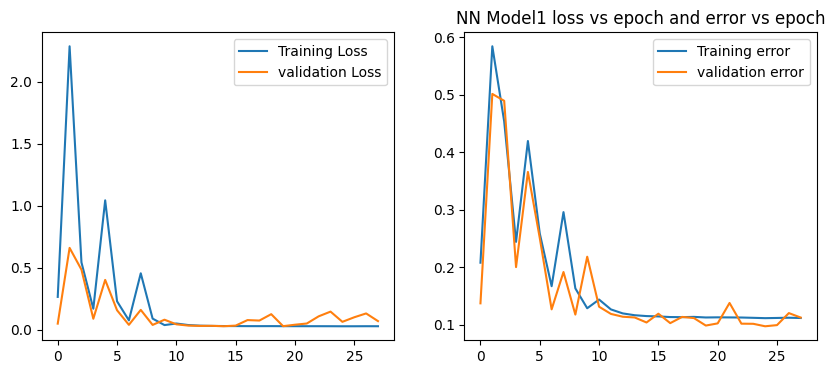

In [163]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
mae = history1.history['mean_absolute_error']
val_mae = history1.history['val_mean_absolute_error']


# plt.figure(figsize = (12,10))
f,(ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
ax1.plot(loss, label = 'Training Loss')
ax1.plot(val_loss, label = 'validation Loss')

ax1.legend()
ax2.plot(mae, label = 'Training error')
ax2.plot(val_mae, label = 'validation error')
ax2.legend()

plt.title('NN Model1 loss vs epoch and error vs epoch')

plt.savefig('Train and valid loss for NN1')
plt.show()


# # Plot the training and validation loss
# plt.plot(loss, label='Training loss')
# plt.plot(val_loss, label='Validation loss')
# plt.legend()
# plt.show()


# # Plot the training and validation loss
# plt.plot(mae, label='Training error')
# plt.plot(val_mae, label='Validation error')
# plt.legend()
# plt.show()

**Model Evaluation**

In [120]:
y_pred_nn1 = model1.predict(X_test_scaled)

1141/1141 [==============================] - 23s 19ms/step


In [143]:
# calculating mean square error (mse), mean absolute error (mae) and root mean square error (rmse)
rmse_nn1 = (metrics.mean_squared_error(y_test_scaled, y_pred_nn1))**0.5
mse_nn1 = metrics.mean_squared_error(y_test_scaled,y_pred_nn1)
mae_nn1 = metrics.mean_absolute_error(y_test_scaled,y_pred_nn1)
print('rmse: ', rmse_nn1)
print('mse: ', mse_nn1)
print('mae:', mae_nn1)

rmse:  0.06119737693140662
mse:  0.0037451189432846596
mae: 0.041740932026685315


**MODEL 2** 
- changing the activation  function from relu to leaky relu
- reducing the number of neurons
- introducing learning rate sceduler

In [122]:
# learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 4:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [123]:
hidden_units1 = 82668
model_nn2 = keras.Sequential(
layers = [
    layers.Dense(units = hidden_units1,  kernel_regularizer = regularizers.L1(1e-5)),
    layers.LeakyReLU(),
    BatchNormalization(),
    Dropout(0.4),
    layers.Dense(1, activation = 'linear')
]
)

In [124]:
# compiling the model
model_nn2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])

In [125]:
start_time = time.time()

history = model_nn2.fit(X_train_scaled, y_train_scaled, epochs=30,
                    validation_split=0.35, callbacks = [early_stop,scheduler])

end_time = time.time()
print((end_time - start_time )/60, 'minutes')

Epoch 1/30
2967/2967 [==============================] - 620s 208ms/step - loss: 0.2634 - mean_absolute_error: 0.2079 - val_loss: 0.0476 - val_mean_absolute_error: 0.1373
Epoch 2/30
2967/2967 [==============================] - 622s 210ms/step - loss: 2.2858 - mean_absolute_error: 0.5843 - val_loss: 0.6589 - val_mean_absolute_error: 0.5015
Epoch 3/30
2967/2967 [==============================] - 612s 206ms/step - loss: 0.5419 - mean_absolute_error: 0.4537 - val_loss: 0.4834 - val_mean_absolute_error: 0.4895
Epoch 4/30
2967/2967 [==============================] - 619s 209ms/step - loss: 0.1680 - mean_absolute_error: 0.2442 - val_loss: 0.0871 - val_mean_absolute_error: 0.2003
Epoch 5/30
2967/2967 [==============================] - 615s 207ms/step - loss: 1.0426 - mean_absolute_error: 0.4196 - val_loss: 0.4005 - val_mean_absolute_error: 0.3658
Epoch 6/30
2967/2967 [==============================] - 619s 209ms/step - loss: 0.2282 - mean_absolute_error: 0.2588 - val_loss: 0.1558 - val_mean_abs

In [126]:
y_pred_nn2 = model_nn2.predict(X_test_scaled)

1141/1141 [==============================] - 30s 26ms/step


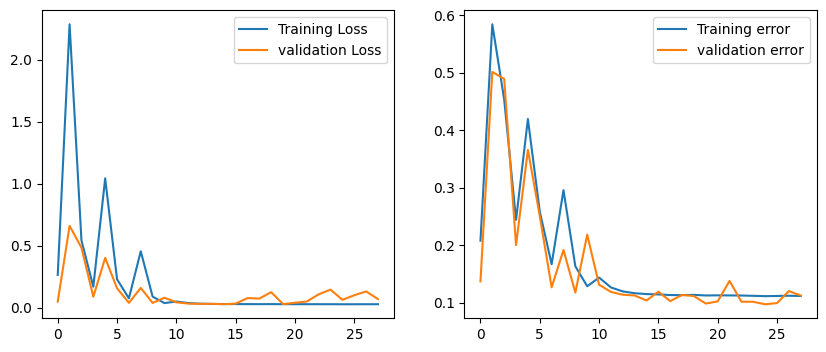

In [162]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']


# plt.figure(figsize = (12,10))
f,(ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
ax1.plot(loss, label = 'Training Loss')
ax1.plot(val_loss, label = 'validation Loss')
ax1.legend()
ax2.plot(mae, label = 'Training error')
ax2.plot(val_mae, label = 'validation error')
ax2.legend()

plt.savefig('Train and valid loss for NN2')
plt.show()

**Model Evaluation**

In [145]:
# calculating mean square error (mse), mean absolute error (mae) and root mean square error (rmse)
rmse_nn2 = (metrics.mean_squared_error(y_test_scaled, y_pred_nn2))**0.5
mse_nn2 = metrics.mean_squared_error(y_test_scaled,y_pred_nn2)
mae_nn2 = metrics.mean_absolute_error(y_test_scaled,y_pred_nn2)
print('rmse: ', rmse_nn2)
print('mse: ', mse_nn2)
print('mae:', mae_nn2)

rmse:  0.2796426553647495
mse:  0.07820001469944807
mae: 0.11199196555900973


**RESULT COMPARISON**

In [171]:
model_comp = pd.DataFrame(columns = ['model','rmse','mse','mae'])

# adding model and their corresponding errors
model_comp.loc[0] = ['Random Forest',rmse_rfr,mse_rfr,mae_rfr]
model_comp.loc[1] = ['Random Forest (Tuned)',rmse_rfr_t,mse_rfr_t,mae_rfr_t]
model_comp.loc[2] = ['Neural Network 1',rmse_nn1,mse_nn1,mae_nn1]
model_comp.loc[3] = ['Neural Network 2',rmse_nn2,mse_nn2,mae_nn2]

In [172]:
model_comp.set_index('model')

,rmse,mse,mae
model,,,
Random Forest,5.705535,32.553131,3.184237
Random Forest (Tuned),10.901521,118.843171,8.267640
Neural Network 1,0.061197,0.003745,0.041741
Neural Network 2,0.279643,0.078200,0.111992


We can see that first NN model i.e. *Neural Network 1* outperfromed all other models. It gave lease rmse (6%). This also shows that deep learning models have shown drastic improvements in terms of error reduction and enhance the model's accuracy.